In [25]:
import numpy as np
import time
import math
import random
import matplotlib.pyplot as plt
input_range=[1000,3000,7000,10000,25000,40000,50000]



In [ ]:
final_time =np.zeros((5,7)) #Algos vs input_range

In [ ]:
#Q1 Insertion Sort

def insertionSort(arr): 
  
    # Traverse through 1 to len(arr) 
    for i in range(1, len(arr)): 
  
        key = arr[i] 

        j = i-1
        while j >=0 and key < arr[j] : 
            arr[j+1] = arr[j] 
            j -= 1
        arr[j+1] = key 


avg_time = np.zeros((1,3))
for i in range(len(input_range)):
    for j in range(0,3,1):
        np.random.seed(j)
        input=np.random.randint(1,100000,input_range[i])
        input.sort()
        
        
        start=time.time()
        insertionSort(input)
        end=time.time()
        #print(end-start)
        avg_time[0][j]=end-start
        
    final_time[0,i]=round(sum(avg_time[0])/3,3)
#print(final_time)

In [23]:
#Q2 Merge Sort

def mergeSort(arr): 
    if len(arr) >1: 
        mid = len(arr)//2 #Finding the mid of the array 
        L = arr[:mid] # Dividing the array elements  
        R = arr[mid:] # into 2 halves 
  
        mergeSort(L) # Sorting the first half 
        mergeSort(R) # Sorting the second half 
  
        i = j = k = 0
          
        # Copy data to temp arrays L[] and R[] 
        while i < len(L) and j < len(R): 
            if L[i] < R[j]: 
                arr[k] = L[i] 
                i+=1
            else: 
                arr[k] = R[j] 
                j+=1
            k+=1
          
        # Checking if any element was left 
        while i < len(L): 
            arr[k] = L[i] 
            i+=1
            k+=1
          
        while j < len(R): 
            arr[k] = R[j] 
            j+=1
            k+=1
            

avg_time = np.zeros((1,3))
for i in range(len(input_range)):
    for j in range(0,3,1):
        np.random.seed(j)
        input=np.random.randint(1,100000,input_range[i])
        input.sort()
        start=time.time()
        mergeSort(input)
        end=time.time()
        #print(end-start)
        avg_time[0][j]=end-start
        
    final_time[1,i]=round(sum(avg_time[0])/3,3)

In [21]:
#Q3 Heapsort [vector based]

def heap_insert(input,a): 
	for j in range(len(input)):
            a.append(input[j])
            n=len(a)
            i=math.ceil(n/2)-1
            while i>0:
                largest = i
                
                l = 2 * i 	 # left = 2*i + 1 
                r = 2 * i + 1	 # right = 2*i + 2 
                if l < n and a[i] < a[l]: 
                    largest = l
                    
                if r < n and a[largest] < a[r]: 
                    largest = r
                    
                
                if largest != i:
                    a[i],a[largest] = a[largest],a[i] # swap
                    i=math.ceil((i+1)/2)-1
                else:
                    break
            #print(a)

def heapSort(a): 
        n = len(a) 
        #set_trace()
        for j in range(n-1, 1, -1): 
            a[j], a[1] = a[1], a[j]
            i=1
            n=j
            largest = i
            #print(j,a)
            #pdb.set_trace()
            while True:
                #s=0
                #largest = i
                l = 2 * i 	 # left = 2*i 
                r = 2 * i + 1	 # right = 2*i + 1 
                if l < n and a[i] < a[l]: 
                    largest = l
                    
                if r < n and a[largest] < a[r]: 
                    largest = r
                    
                if largest != i: 
                    a[i],a[largest] = a[largest],a[i]
                    i=largest
                else:
                    break          

            
a=[0]
avg_time = np.zeros((1,3))
for i in range(len(input_range)):
    for j in range(0,3,1):
        np.random.seed(j)
        input=np.random.randint(1,100000,input_range[i])
        input.sort()
        start=time.time()
        heap_insert(input,a) 
        heapSort(a) 
        end=time.time()
       
        avg_time[0][j]=end-start
        
    final_time[2,i]=round(sum(avg_time[0])/3,3)


In [19]:

#Q4 In Place quicksort

def sub_partition(array, start, end, idx_pivot):

    'returns the position where the pivot winds up'

    if not (start <= idx_pivot <= end):
        raise ValueError('idx pivot must be between start and end')

    array[start], array[idx_pivot] = array[idx_pivot], array[start]
    pivot = array[start]
    i = start + 1
    j = start + 1

    while j <= end:
        if array[j] <= pivot:
            array[j], array[i] = array[i], array[j]
            i += 1
        j += 1

    array[start], array[i - 1] = array[i - 1], array[start]
    return i - 1

def quicksort(array, start=0, end=None):

    if end is None:
        end = len(array) - 1

    if end - start < 1:
        return

    idx_pivot = random.randint(start, end)
    i = sub_partition(array, start, end, idx_pivot)
    #print array, i, idx_pivot
    quicksort(array, start, i - 1)
    quicksort(array, i + 1, end)

avg_time = np.zeros((1,3))
for i in range(len(input_range)):
    for j in range(0,3,1):
        np.random.seed(j)
        input=np.random.randint(1,100000,input_range[i])
         
        input.sort()
        n = len(input)
        
        start=time.time()
        quicksort(input,0,n-1)
        end=time.time()
        #print(end-start)
        avg_time[0][j]=end-start
        
    final_time[3,i]=round(sum(avg_time[0])/3,3)  

In [32]:
#Q5 Modified quicksort

CUTOFF = 10

def quicksort(a, low, high ):
        #set_trace()
        if low + CUTOFF > high :
            insertionSort( a, low, high )
        else:
            # Sort low, middle, high
            middle = int(( low + high ) / 2);
            if a[middle]< a[low]:
                swapReferences( a, low, middle )
            if a[high]< a[low]:
                swapReferences( a, low, high )
            if a[high]<a[ middle]: 
                swapReferences( a, middle, high )
             
            # Place pivot at position high - 1
            swapReferences( a, middle, high - 1 )
            pivot = a[ high - 1 ];
             
            # Begin partitioning
            j= high - 1;
            for i in range(low , high-1):   
                while a[i] < pivot:
                    i=i+1
                while pivot <= a[j] :
                    j=j-1
                    
                if( i >= j ):
                    break;
                swapReferences( a, i, j )
                
            # Restore pivot
            swapReferences( a, i, high - 1 )
             
            quicksort( a, low, i - 1 )   # Sort small elements
            quicksort( a, i + 1, high )  # Sort large elements

def swapReferences(a, index1, index2 ):
        #set_trace()
        temp = a[index1];
        a[index1] = a[index2];
        a[index2] = temp;
        #print(a)
        
def insertionSort(arr, low, high): 
    #set_trace()
  
    # Traverse through 1 to len(arr) 
    for i in range(low + 1, high + 1): 
  
        key = arr[i] 
    
        j = i-1
        while j >=0 and key < arr[j] : 
            arr[j+1] = arr[j] 
            j -= 1
        arr[j+1] = key  

avg_time = np.zeros((1,3))
for i in range(len(input_range)):
    for j in range(0,3,1):
        np.random.seed(j)
        input=np.random.randint(1,100000,input_range[i]) 
        
        input.sort()
        n = len(input) 
        
        start=time.time()
        quicksort(input,0,n-1)
        end=time.time()
        #print(end-start)
        avg_time[0][j]=end-start
        
    final_time[4,i]=round(sum(avg_time[0])/3,3)    
    

In [33]:
print(final_time)

[[0.001 0.003 0.007 0.01  0.016 0.03  0.045]
 [0.012 0.031 0.083 0.089 0.286 0.426 0.672]
 [0.022 0.06  0.102 0.119 0.441 0.639 0.956]
 [0.01  0.029 0.118 0.121 0.293 0.643 0.743]
 [0.004 0.01  0.029 0.049 0.118 0.147 0.214]]


In [34]:
insertion_list = final_time[0].tolist()
merge_list = final_time[1].tolist()
heap_list = final_time[2].tolist()
in_place_quick_list = final_time[3].tolist()
modified_quick_list = final_time[4].tolist()

In [35]:
insertion = np.array(insertion_list)
merge = np.array(merge_list)
heap = np.array(heap_list)
in_place_quick = np.array(in_place_quick_list)
modified_quick = np.array(modified_quick_list)

([<matplotlib.axis.XTick at 0x16bb048a588>,
 <a list of 7 Text xticklabel objects>)

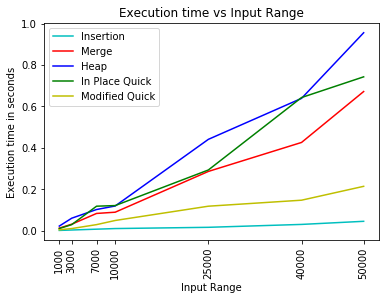

In [37]:
plt.plot(input_range,insertion,color='c',label='Insertion Sort')
plt.plot(input_range,final_time[1],color='r',label='Merge Sort')
plt.plot(input_range,final_time[2],color='b',label='Heap Sort')
plt.plot(input_range,final_time[3],color='g',label='In Place Quick Sort')
plt.plot(input_range,final_time[4],color='y',label='Modified Quick Sort')
plt.title('Execution time vs Input Range')
plt.xlabel('Input Range')
plt.ylabel('Execution time in seconds')
plt.legend(['Insertion','Merge','Heap','In Place Quick','Modified Quick'])
plt.xticks(input_range,rotation='vertical')